In [1]:
import pandas as pd
import numpy as np

In [2]:
db = pd.read_csv('credit_data.csv')

#replace negative age with mean
db.loc[db.age < 0, 'age'] = db['age'][db.age > 0].mean()

db.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
X = db.iloc[:, 1:4].values #create X
y = db.iloc[:, 4].values #create y

In [4]:
#replace Nan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean') 
imputer = imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

In [5]:
#scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
#split in train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Naive Bayes

In [7]:
#train and test
from sklearn.naive_bayes import GaussianNB
clf_Naive_Bayes = GaussianNB()
clf_Naive_Bayes.fit(X_train, y_train)
predict_Naive_Bayes = clf_Naive_Bayes.predict(X_test)

In [8]:
#metrics
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_Naive_Bayes)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_Naive_Bayes)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.938
Confusion Matrix:
 [[428   8]
 [ 23  41]]


# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf_Desicion_Tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_Desicion_Tree.fit(X_train, y_train)
predict_Desicion_Tree = clf_Desicion_Tree.predict(X_test)

print(clf_Desicion_Tree.feature_importances_)

[0.21219711 0.39503611 0.39276678]


In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

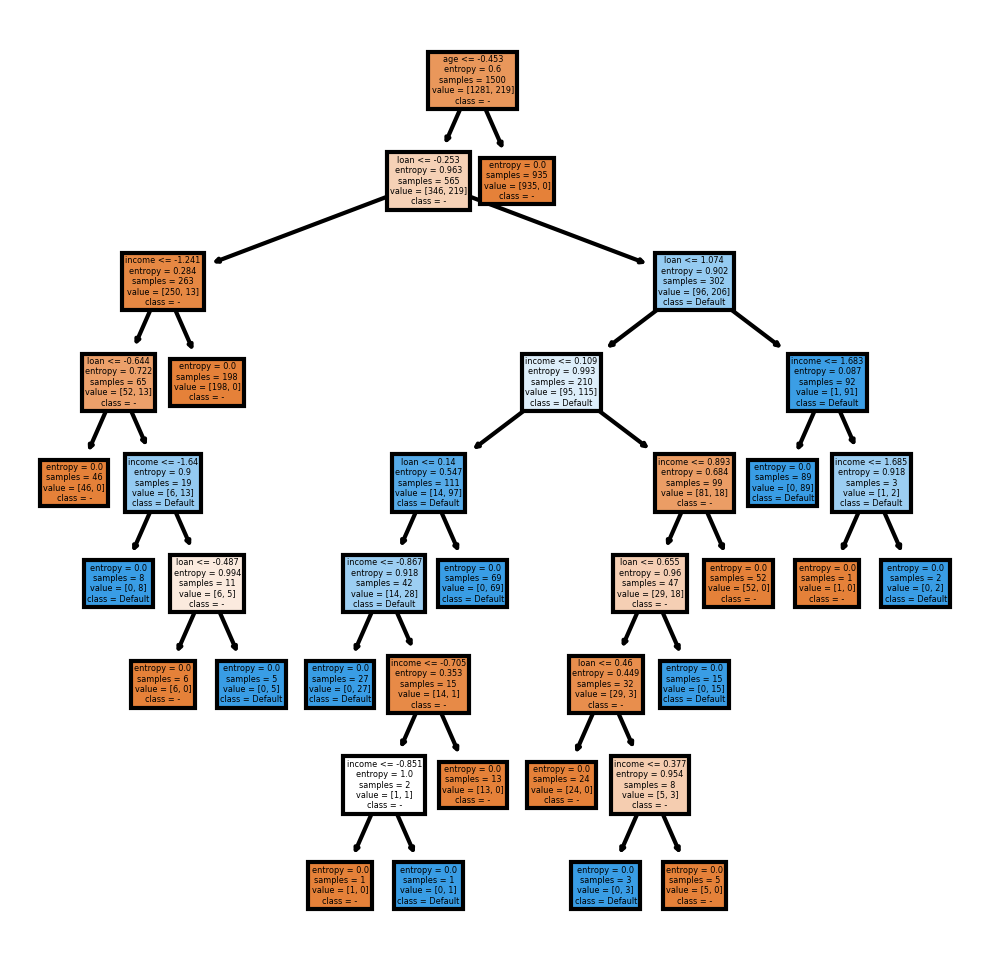

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_Desicion_Tree,
            feature_names = ['income', 'age', 'loan'], 
            class_names= ['-', 'Default'], 
            filled = True);

In [11]:
#metrics
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_Desicion_Tree)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_Desicion_Tree)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.982
Confusion Matrix:
 [[430   6]
 [  3  61]]


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf_RandomForest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
clf_RandomForest.fit(X_train, y_train)
predict_RandomForest = clf_RandomForest.predict(X_test)

In [13]:
#metrics
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_RandomForest)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_RandomForest)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.984
Confusion Matrix:
 [[433   3]
 [  5  59]]


# kNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier #need to scale
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
clf_knn.fit(X_train, y_train)
predict_knn = clf_knn.predict(X_test)

In [15]:
#metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_knn)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_knn)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.986
Confusion Matrix:
 [[432   4]
 [  3  61]]


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
clf_LogisticRegression = LogisticRegression(random_state = 1, solver='lbfgs')
clf_LogisticRegression.fit(X_train, y_train)
predict_LogisticRegression = clf_LogisticRegression.predict(X_test)

In [17]:
#metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_LogisticRegression)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_LogisticRegression)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.946
Confusion Matrix:
 [[423  13]
 [ 14  50]]


# SVM

In [20]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf', random_state = 1, C = 2.0, gamma='auto') #C=Regularization parameter
clf_svm.fit(X_train, y_train)
predict_svm = clf_svm.predict(X_test)

In [21]:
#metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_svm)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_svm)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.988
Confusion Matrix:
 [[434   2]
 [  4  60]]


# Neural Network

In [38]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(verbose=False,
                       solver='adam',
                       hidden_layer_sizes=(100,),
                       activation='relu'
                      )
clf_nn.fit(X_train, y_train)
predict_nn = clf_nn.predict(X_test)

C:\Users\crist\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
#metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_nn)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_nn)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.996
Confusion Matrix:
 [[436   0]
 [  2  62]]


# Neural Network - Keras

In [41]:
import keras

In [43]:
from keras.models import Sequential
from keras.layers import Dense

clf_keras = Sequential()
clf_keras.add(Dense(units=2, activation='relu',input_dim=3))
clf_keras.add(Dense(units=2, activation='relu'))
clf_keras.add(Dense(units=1, activation='sigmoid'))
clf_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
clf_keras.fit(X_train, y_train, batch_size=10, epochs=100)

Instructions for updating:
Use tf.cast instead.


C:\Users\crist\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9430 - acc: 0.3373
Epoch 2/100
1500/1500 [==============================] - 0s 237us/step - loss: 0.7053 - acc: 0.5880
Epoch 3/100
1500/1500 [==============================] - 0s 200us/step - loss: 0.6131 - acc: 0.8100
Epoch 4/100
1500/1500 [==============================] - 0s 167us/step - loss: 0.5640 - acc: 0.8807
Epoch 5/100
1500/1500 [==============================] - 0s 168us/step - loss: 0.5286 - acc: 0.8860
Epoch 6/100
1500/1500 [==============================] - 0s 169us/step - loss: 0.4985 - acc: 0.8853
Epoch 7/100
1500/1500 [==============================] - 0s 170us/step - loss: 0.4704 - acc: 0.8893
Epoch 8/100
1500/1500 [==============================] - 0s 205us/step - loss: 0.4432 - acc: 0.8980
Epoch 9/100
1500/1500 [==============================] - 0s 177us/step - loss: 0.4169 - acc: 0.9120
Epoch 10/100
1500/1500 [==============================] - 0s 250us/step - loss: 0.3917 - acc: 0.9160
E

Epoch 82/100
1500/1500 [==============================] - 0s 194us/step - loss: 0.1207 - acc: 0.9493
Epoch 83/100
1500/1500 [==============================] - 0s 163us/step - loss: 0.1208 - acc: 0.9487
Epoch 84/100
1500/1500 [==============================] - 0s 167us/step - loss: 0.1205 - acc: 0.9487
Epoch 85/100
1500/1500 [==============================] - 0s 202us/step - loss: 0.1203 - acc: 0.9467
Epoch 86/100
1500/1500 [==============================] - 0s 203us/step - loss: 0.1202 - acc: 0.9480
Epoch 87/100
1500/1500 [==============================] - 0s 167us/step - loss: 0.1203 - acc: 0.9467
Epoch 88/100
1500/1500 [==============================] - 0s 188us/step - loss: 0.1201 - acc: 0.9467
Epoch 89/100
1500/1500 [==============================] - 0s 189us/step - loss: 0.1199 - acc: 0.9480
Epoch 90/100
1500/1500 [==============================] - 0s 169us/step - loss: 0.1199 - acc: 0.9473
Epoch 91/100
1500/1500 [==============================] - 0s 187us/step - loss: 0.1199 - ac

In [44]:
predict_keras = clf_keras.predict(X_test)
predict_keras = (predict_keras > 0.5)

In [45]:
#metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predict_keras)
print('Accuracy:', accuracy)

matrix = confusion_matrix(y_test, predict_keras)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.946
Confusion Matrix:
 [[423  13]
 [ 14  50]]


# K-Fold

In [52]:
#k-Fold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
clf_cv = GaussianNB()

result = cross_val_score(clf_cv, X_train, y_train, cv=10)
print(result.mean())

0.9233333333333335


In [70]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
result2 = []
matrix = []
for train_index, test_index in kfold.split(X, np.zeros(shape=(X.shape[0], 1))):
    #print(X[test_index])
    clf_kf = GaussianNB()
    clf_kf.fit(X[train_index], y[train_index])
    predict_kf = clf_kf.predict(X[test_index])
    accuracy = accuracy_score(y[test_index], predict_kf)
    matrix.append(confusion_matrix(y[test_index], predict_kf))
    result2.append(accuracy)

result2 = np.asarray(result2)
print(result2)
mean_matrix = np.mean(matrix, axis =0)
print(mean_matrix)

[0.945 0.905 0.925 0.935 0.91  0.935 0.94  0.925 0.93  0.905]
[[168.    3.7]
 [ 11.2  17.1]]


# Deploy

In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

clf_SVM = SVC(kernel='rbf', C= 2.0)
clf_SVM.fit(X,y)

clf_RF = RandomForestClassifier(n_estimators=40, criterion='entropy')
clf_RF.fit(X,y)

clf_MLP = MLPClassifier(verbose = False, max_iter=1000,
                        tol= 0.00001, solver='adam',
                        hidden_layer_sizes=(100), activation='relu',
                        batch_size = 200, learning_rate_init=0.001)
clf_MLP.fit(X,y)

C:\Users\crist\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(batch_size=200, hidden_layer_sizes=100, max_iter=1000, tol=1e-05)

In [80]:
import pickle
pickle.dump(clf_SVM, open('svn_ok.sav', 'wb'))
pickle.dump(clf_RF, open('rf_ok.sav', 'wb'))
pickle.dump(clf_MLP, open('mlp_ok.sav', 'wb'))

In [81]:
svm = pickle.load(open('svn_ok.sav', 'rb'))
rf = pickle.load(open('rf_ok.sav', 'rb'))
mlp = pickle.load(open('mlp_ok.sav', 'rb'))

In [83]:
result_svm = svm.score(X, y)
result_rf = rf.score(X, y) 
result_mlp = mlp.score(X, y) 

0.989

In [89]:
new_register =[[50000, 40, 5000]]
new_register = np.asarray(new_register)
new_register = new_register.reshape(-1,1)
new_register = scaler.fit_transform(new_register)
new_register = new_register.reshape(-1,3)

predict_svm = svm.predict(new_register)
predict_rf = rf.predict(new_register)
predict_mlp = mlp.predict(new_register)
print(predict_svm, predict_rf, predict_mlp)

[0] [0] [0]
